# Sleep Quality Predictors.Model Classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import klib

from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from joblib import dump

from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'/Users/user/ML course/2nd_month/project/sleep_cycle_productivity.csv')
df.head()

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,2024-04-12,1860,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6
1,2024-11-04,1769,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7
2,2024-08-31,2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10
3,2024-02-22,8041,37,Other,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2
4,2024-02-23,4843,46,Other,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           5000 non-null   object 
 1   Person_ID                      5000 non-null   int64  
 2   Age                            5000 non-null   int64  
 3   Gender                         5000 non-null   object 
 4   Sleep Start Time               5000 non-null   float64
 5   Sleep End Time                 5000 non-null   float64
 6   Total Sleep Hours              5000 non-null   float64
 7   Sleep Quality                  5000 non-null   int64  
 8   Exercise (mins/day)            5000 non-null   int64  
 9   Caffeine Intake (mg)           5000 non-null   int64  
 10  Screen Time Before Bed (mins)  5000 non-null   int64  
 11  Work Hours (hrs/day)           5000 non-null   float64
 12  Productivity Score             5000 non-null   i

In [4]:
klib.missingval_plot(df)

No missing values found in the dataset.


In [5]:
# 1. Umumiy ma'lumotlar
print("Dataset shakli:", df.shape)
print("\n Ustun nomlari:", df.columns.tolist())
print("\n Null qiymatlar:")
print(df.isnull().sum())

Dataset shakli: (5000, 15)

 Ustun nomlari: ['Date', 'Person_ID', 'Age', 'Gender', 'Sleep Start Time', 'Sleep End Time', 'Total Sleep Hours', 'Sleep Quality', 'Exercise (mins/day)', 'Caffeine Intake (mg)', 'Screen Time Before Bed (mins)', 'Work Hours (hrs/day)', 'Productivity Score', 'Mood Score', 'Stress Level']

 Null qiymatlar:
Date                             0
Person_ID                        0
Age                              0
Gender                           0
Sleep Start Time                 0
Sleep End Time                   0
Total Sleep Hours                0
Sleep Quality                    0
Exercise (mins/day)              0
Caffeine Intake (mg)             0
Screen Time Before Bed (mins)    0
Work Hours (hrs/day)             0
Productivity Score               0
Mood Score                       0
Stress Level                     0
dtype: int64


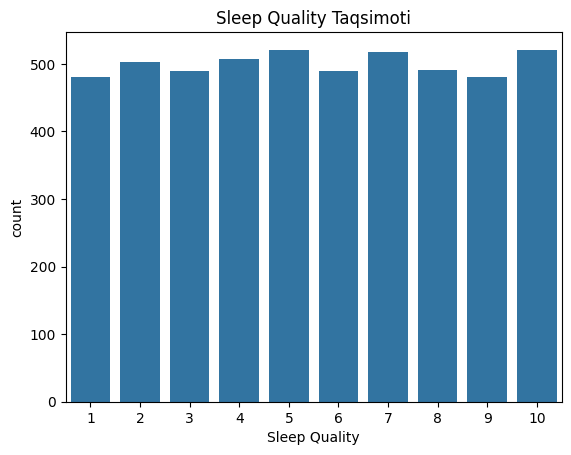

In [6]:
sns.countplot(x='Sleep Quality', data=df)
plt.title("Sleep Quality Taqsimoti")
plt.show()

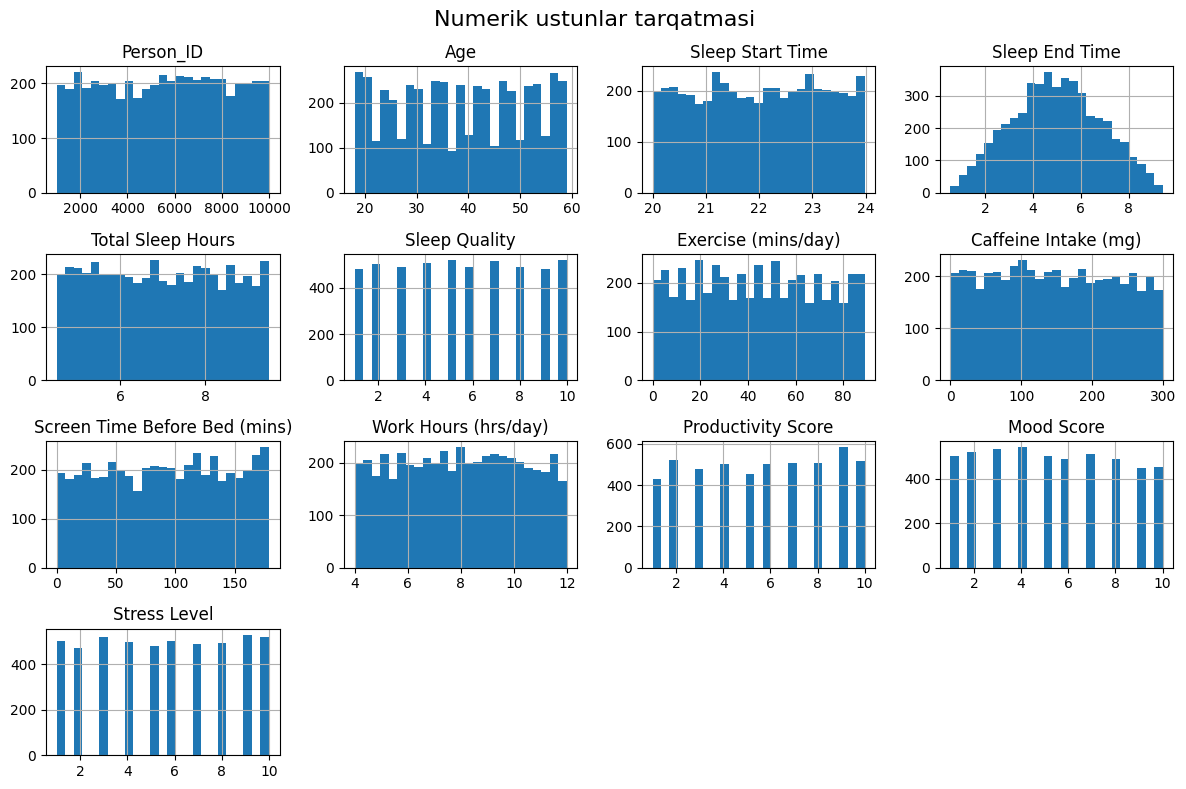

In [7]:
df.hist(figsize=(12, 8), bins=25)
plt.suptitle("Numerik ustunlar tarqatmasi", fontsize=16)
plt.tight_layout()
plt.show()

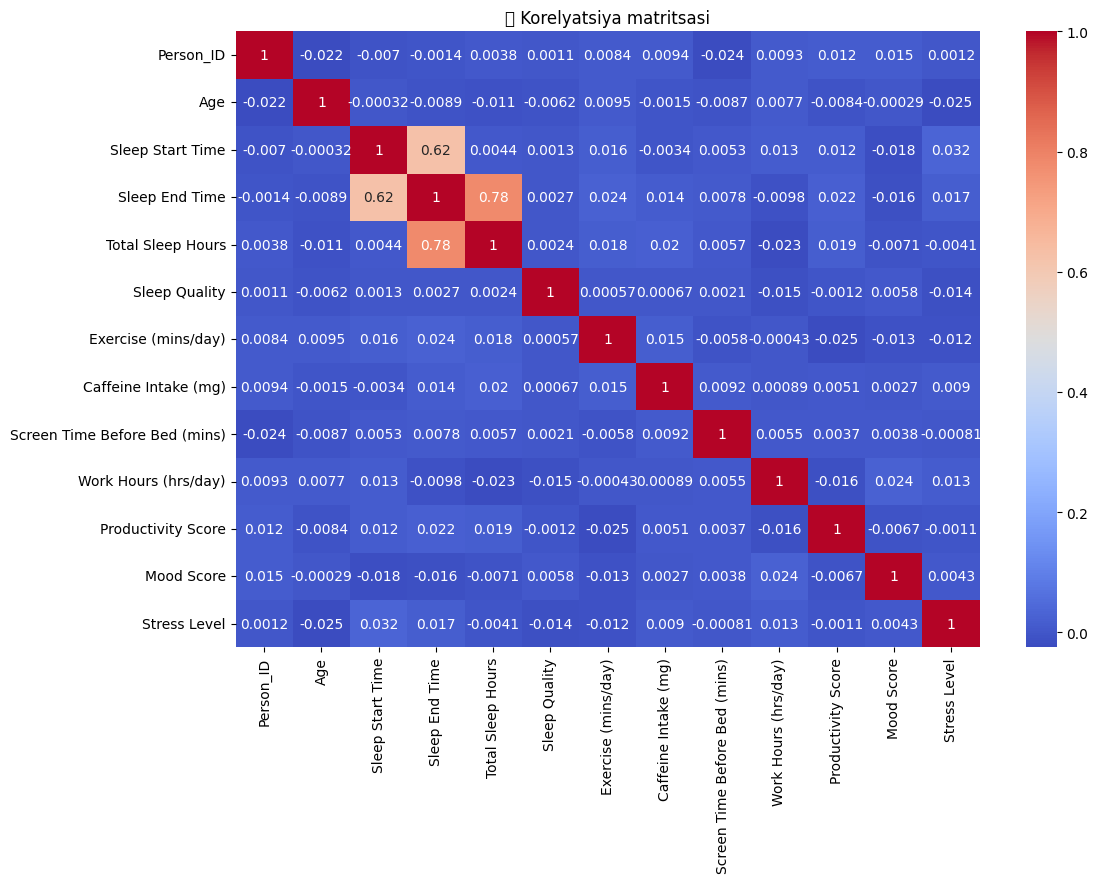

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("📊 Korelyatsiya matritsasi")
plt.show()

In [9]:
if 'Sleep Quality Category' in df.columns and 'Gender' in df.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x='Sleep Quality Category', hue='Gender')
    plt.title("Gender va Sleep Quality Category taqsimoti")
    plt.show()

In [10]:
df.isnull().sum()         # no missing values found

Date                             0
Person_ID                        0
Age                              0
Gender                           0
Sleep Start Time                 0
Sleep End Time                   0
Total Sleep Hours                0
Sleep Quality                    0
Exercise (mins/day)              0
Caffeine Intake (mg)             0
Screen Time Before Bed (mins)    0
Work Hours (hrs/day)             0
Productivity Score               0
Mood Score                       0
Stress Level                     0
dtype: int64

In [11]:
print(df.columns)

Index(['Date', 'Person_ID', 'Age', 'Gender', 'Sleep Start Time',
       'Sleep End Time', 'Total Sleep Hours', 'Sleep Quality',
       'Exercise (mins/day)', 'Caffeine Intake (mg)',
       'Screen Time Before Bed (mins)', 'Work Hours (hrs/day)',
       'Productivity Score', 'Mood Score', 'Stress Level'],
      dtype='object')


In [6]:
df.drop(columns=['Date', 'Person_ID'], inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            5000 non-null   int64  
 1   Gender                         5000 non-null   object 
 2   Sleep Start Time               5000 non-null   float64
 3   Sleep End Time                 5000 non-null   float64
 4   Total Sleep Hours              5000 non-null   float64
 5   Sleep Quality                  5000 non-null   int64  
 6   Exercise (mins/day)            5000 non-null   int64  
 7   Caffeine Intake (mg)           5000 non-null   int64  
 8   Screen Time Before Bed (mins)  5000 non-null   int64  
 9   Work Hours (hrs/day)           5000 non-null   float64
 10  Productivity Score             5000 non-null   int64  
 11  Mood Score                     5000 non-null   int64  
 12  Stress Level                   5000 non-null   i

In [7]:
def categorize_sleep_quality(score):
    if score <= 2:
        return 'Poor'
    elif score <= 5:
        return 'Okay'
    elif score <= 7:
        return 'Good'
    else:
        return 'Excellent'

In [8]:
df['Sleep Quality Category'] = df['Sleep Quality'].apply(categorize_sleep_quality)

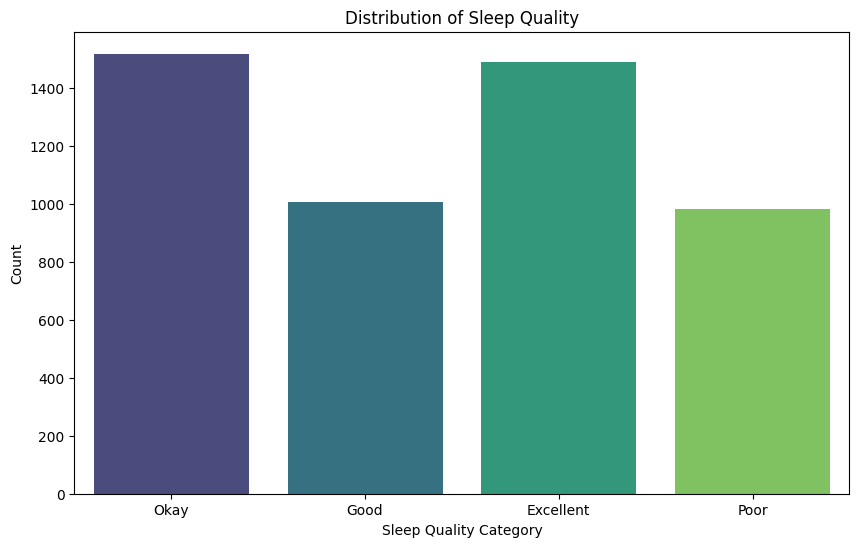

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sleep Quality Category', palette='viridis')
plt.title('Distribution of Sleep Quality')
plt.xlabel('Sleep Quality Category')
plt.ylabel('Count')
plt.show()

In [17]:
df.head()

,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level,Sleep Quality Category
0,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6,Okay
1,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7,Okay
2,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10,Good
3,37,Other,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2,Excellent
4,46,Other,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9,Excellent


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            5000 non-null   int64  
 1   Gender                         5000 non-null   object 
 2   Sleep Start Time               5000 non-null   float64
 3   Sleep End Time                 5000 non-null   float64
 4   Total Sleep Hours              5000 non-null   float64
 5   Sleep Quality                  5000 non-null   int64  
 6   Exercise (mins/day)            5000 non-null   int64  
 7   Caffeine Intake (mg)           5000 non-null   int64  
 8   Screen Time Before Bed (mins)  5000 non-null   int64  
 9   Work Hours (hrs/day)           5000 non-null   float64
 10  Productivity Score             5000 non-null   int64  
 11  Mood Score                     5000 non-null   int64  
 12  Stress Level                   5000 non-null   i

In [19]:
df['Sleep Quality'].value_counts()

Sleep Quality
5     521
10    521
7     517
4     508
2     503
8     491
3     490
6     489
9     480
1     480
Name: count, dtype: int64

In [9]:
# Encoding
label=LabelEncoder()
df['Gender']=label.fit_transform(df['Gender'])

encoder=OrdinalEncoder(categories=[['Poor','Okay','Good','Excellent']])
df[['Sleep Quality Category']] = encoder.fit_transform(df[['Sleep Quality Category']])

In [10]:
df['Sleep Quality Category'] = df['Sleep Quality Category'].astype(int)
df['Gender'] = df['Gender'].astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            5000 non-null   int64  
 1   Gender                         5000 non-null   int64  
 2   Sleep Start Time               5000 non-null   float64
 3   Sleep End Time                 5000 non-null   float64
 4   Total Sleep Hours              5000 non-null   float64
 5   Sleep Quality                  5000 non-null   int64  
 6   Exercise (mins/day)            5000 non-null   int64  
 7   Caffeine Intake (mg)           5000 non-null   int64  
 8   Screen Time Before Bed (mins)  5000 non-null   int64  
 9   Work Hours (hrs/day)           5000 non-null   float64
 10  Productivity Score             5000 non-null   int64  
 11  Mood Score                     5000 non-null   int64  
 12  Stress Level                   5000 non-null   i

In [11]:
# Feature Engineering

# Nap Duration
df['Nap Duration'] = (8 - df['Total Sleep Hours']) * 10 + df['Stress Level'] * 5 - df['Mood Score'] * 3 - df['Work Hours (hrs/day)'] * 2
df['Nap Duration'] = np.maximum(df['Nap Duration'], 0)  

# Room Environment
df['Room Environment'] = df['Sleep Quality'] * 10 - df['Screen Time Before Bed (mins)'] * 0.3 - df['Caffeine Intake (mg)'] * 0.05
df['Room Environment'] = df['Room Environment'].clip(0, 100)  

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            5000 non-null   int64  
 1   Gender                         5000 non-null   int64  
 2   Sleep Start Time               5000 non-null   float64
 3   Sleep End Time                 5000 non-null   float64
 4   Total Sleep Hours              5000 non-null   float64
 5   Sleep Quality                  5000 non-null   int64  
 6   Exercise (mins/day)            5000 non-null   int64  
 7   Caffeine Intake (mg)           5000 non-null   int64  
 8   Screen Time Before Bed (mins)  5000 non-null   int64  
 9   Work Hours (hrs/day)           5000 non-null   float64
 10  Productivity Score             5000 non-null   int64  
 11  Mood Score                     5000 non-null   int64  
 12  Stress Level                   5000 non-null   i

Room Environment                 0.593237
Productivity Score               0.017846
Work Hours (hrs/day)             0.010305
Mood Score                       0.008901
Exercise (mins/day)              0.008768
Stress Level                     0.007305
Screen Time Before Bed (mins)    0.001741
Caffeine Intake (mg)             0.000906
Total Sleep Hours                0.000000
Gender                           0.000000
dtype: float64


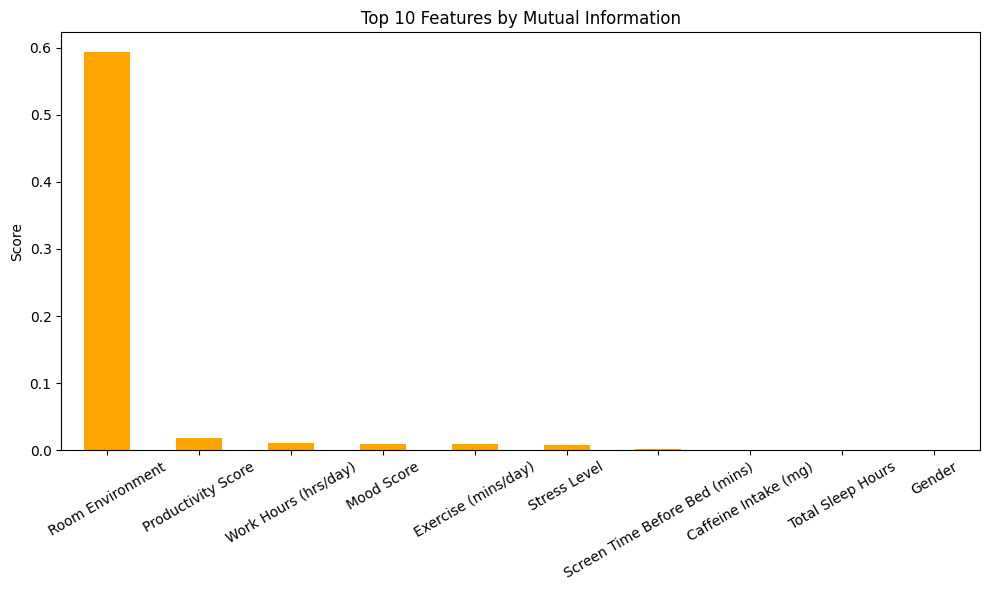

In [26]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = pd.Series(mutual_info_classif(x, y), index=x.columns)
mutual_info_sorted = mutual_info.sort_values(ascending=False).head(10)
print(mutual_info_sorted)

plt.figure(figsize=(10, 6))
mutual_info_sorted.plot(kind='bar', color='orange')
plt.title("Top 10 Features by Mutual Information")
plt.ylabel("Score")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Model Training

In [ ]:
x = df.drop(['Sleep Quality', 'Sleep Quality Category'], axis=1)
y = df['Sleep Quality Category']

In [13]:
x_train,x_temp,y_train,y_temp=train_test_split(x,y,test_size=0.2,random_state=42)
x_test,x_val,y_test,y_val=train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)

# Model Selection - logistic regression


In [14]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
y_pred = lg.predict(x_test)

In [15]:
accuracy_score_lg = accuracy_score(y_test,y_pred)
print(f'Logistic Regression Accuracy: {accuracy_score_lg:.2f}')
cr_lg = classification_report(y_test,y_pred, output_dict=True)
print(classification_report(y_test,y_pred))

Logistic Regression Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.63      0.76      0.69       102
           1       0.70      0.61      0.65       139
           2       0.85      0.81      0.83       103
           3       0.97      0.97      0.97       156

    accuracy                           0.80       500
   macro avg       0.79      0.79      0.79       500
weighted avg       0.80      0.80      0.80       500



# Decision Tree Classifier

In [16]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [17]:
accuracy_score_dt = dt_model.score(x_test, y_test)
print("Accuracy Score: ", accuracy_score_dt)
cm_dt = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

Accuracy Score:  0.844
              precision    recall  f1-score   support

           0       0.63      0.76      0.69       102
           1       0.70      0.61      0.65       139
           2       0.85      0.81      0.83       103
           3       0.97      0.97      0.97       156

    accuracy                           0.80       500
   macro avg       0.79      0.79      0.79       500
weighted avg       0.80      0.80      0.80       500



# hyperparameter tuning for Decision Tree Classifier

In [18]:
param_grid = {
  'max_depth': [3,5,10,None],
  'min_samples_split': [2,5,10],
  'min_samples_leaf': [1,2,5],
  'max_features': ['sqrt','log2',None]
}

grid_search = GridSearchCV(estimator = dt_model, param_grid= param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train, y_train)
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [19]:
best_model_dt = grid_search.best_estimator_
best_model_dt.fit(x_train, y_train)
y_pred = best_model_dt.predict(x_test)
accuracy_score_best_model_dt = accuracy_score(y_test, y_pred)
print(f'Best Model Accuracy: {accuracy_score_best_model_dt:.2f}')
cr_best_model_dt = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

Best Model Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.78      0.61      0.69       102
           1       0.73      0.85      0.78       139
           2       0.91      0.90      0.91       103
           3       0.97      0.97      0.97       156

    accuracy                           0.85       500
   macro avg       0.85      0.83      0.84       500
weighted avg       0.85      0.85      0.85       500



# Random Forest Classifier

In [20]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

accuracy_score_rf = rf.score(x_test, y_test)
print("Accuracy Score: ", accuracy_score_rf)
cr_best_model_rf = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

Accuracy Score:  0.804
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       102
           1       0.72      0.76      0.74       139
           2       0.92      0.74      0.82       103
           3       0.90      0.97      0.93       156

    accuracy                           0.80       500
   macro avg       0.80      0.79      0.79       500
weighted avg       0.81      0.80      0.80       500



# Hyperparameter tuning for Random Forest Classifier

In [21]:
param_grid = {
  'max_depth': [3,5,12,None],
  'min_samples_split': [2,5,10],
  'min_samples_leaf': [1,2,5],
  'max_features': ['sqrt','log2',None]
}

grid_search = GridSearchCV(estimator = rf, param_grid= param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train, y_train)
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'max_depth': 12, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [22]:
best_model_rf = grid_search.best_estimator_
best_model_rf.fit(x_train, y_train)
y_pred = best_model_rf.predict(x_test)
accuracy_score_best_model_rf = accuracy_score(y_test, y_pred)
print(f'Best Model Accuracy: {accuracy_score_best_model_rf:.2f}')
cr_best_model_rf = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

Best Model Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       102
           1       0.79      0.81      0.80       139
           2       0.98      0.98      0.98       103
           3       1.00      0.99      1.00       156

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500



# Gradient Boosting Classifier

In [23]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)

In [24]:
accuracy_score_gb = gb.score(x_test, y_test)
print("Accuracy Score: ", accuracy_score_gb)
cr_best_model_rf = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

Accuracy Score:  0.888
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       102
           1       0.80      0.81      0.81       139
           2       0.98      0.97      0.98       103
           3       1.00      0.99      1.00       156

    accuracy                           0.89       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.89      0.89      0.89       500



# XGBoost Classifier

In [27]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

In [28]:
accuracy_score_xgb = xgb.score(x_test, y_test)
print("Accuracy Score: ", accuracy_score_xgb)
cm_xgb = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

Accuracy Score:  0.886
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       102
           1       0.79      0.81      0.80       139
           2       0.98      0.98      0.98       103
           3       1.00      1.00      1.00       156

    accuracy                           0.89       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.89      0.89      0.89       500



# LightGBM Classifier

In [29]:
lgb = LGBMClassifier()
lgb.fit(x_train, y_train)
y_pred = lgb.predict(x_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001621 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2098
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 14
[LightGBM] [Info] Start training from score -1.611941
[LightGBM] [Info] Start training from score -1.184988
[LightGBM] [Info] Start training from score -1.606941
[LightGBM] [Info] Start training from score -1.223326


In [30]:
accuracy_score_lgb = lgb.score(x_test, y_test)
print("Accuracy Score: ", accuracy_score_lgb)
cm_lgb = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

Accuracy Score:  0.892
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       102
           1       0.82      0.80      0.81       139
           2       0.98      0.98      0.98       103
           3       1.00      1.00      1.00       156

    accuracy                           0.89       500
   macro avg       0.88      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500



In [31]:
data = [
    ["Logistic Regression", accuracy_score_lg, cr_lg['0']['precision'], cr_lg['0']['recall'], cr_lg['0']['f1-score']],
    ["Decision Tree Classifier", accuracy_score_best_model_dt, cr_best_model_dt['0']['precision'], cr_best_model_dt['0']['recall'], cr_best_model_dt['0']['f1-score']],
    ["Random Forest Classifier", accuracy_score_best_model_rf, cr_best_model_rf['0']['precision'], cr_best_model_rf['0']['recall'], cr_best_model_rf['0']['f1-score']],
    ["Gradient Boosting Classifier", accuracy_score_gb, cr_best_model_rf['0']['precision'], cr_best_model_rf['0']['recall'], cr_best_model_rf['0']['f1-score']],
    ["XGBoost Classifier", accuracy_score_xgb, cm_xgb['0']['precision'], cm_xgb['0']['recall'], cm_xgb['0']['f1-score']],
    ["LightGBM Classifier", accuracy_score_lgb, cm_lgb['0']['precision'], cm_lgb['0']['recall'], cm_lgb['0']['f1-score']],
]

sorted_data = sorted(data, key=lambda x: x[1], reverse=True)

headers = ['Model', 'accuracy score', 'Precision', 'Recall', 'F1-Score']
print(tabulate(sorted_data, headers=headers, tablefmt='grid')) 

+------------------------------+------------------+-------------+----------+------------+
| Model                        |   accuracy score |   Precision |   Recall |   F1-Score |
+==============================+==================+=============+==========+============+
| LightGBM Classifier          |            0.892 |    0.742857 | 0.764706 |   0.753623 |
+------------------------------+------------------+-------------+----------+------------+
| Gradient Boosting Classifier |            0.888 |    0.745098 | 0.745098 |   0.745098 |
+------------------------------+------------------+-------------+----------+------------+
| XGBoost Classifier           |            0.886 |    0.744898 | 0.715686 |   0.73     |
+------------------------------+------------------+-------------+----------+------------+
| Random Forest Classifier     |            0.884 |    0.745098 | 0.745098 |   0.745098 |
+------------------------------+------------------+-------------+----------+------------+
| Decision

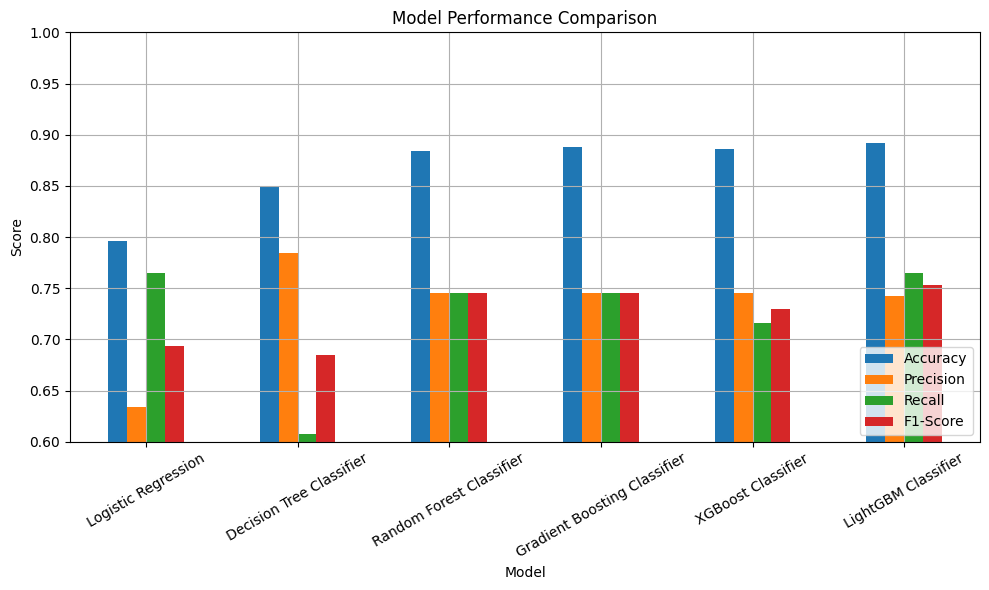

In [34]:
df1 = pd.DataFrame(data, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
df1.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0.6, 1.0)
plt.xticks(rotation=30)
plt.legend(loc='lower right')
plt.tight_layout()
plt.grid(True)
plt.show()

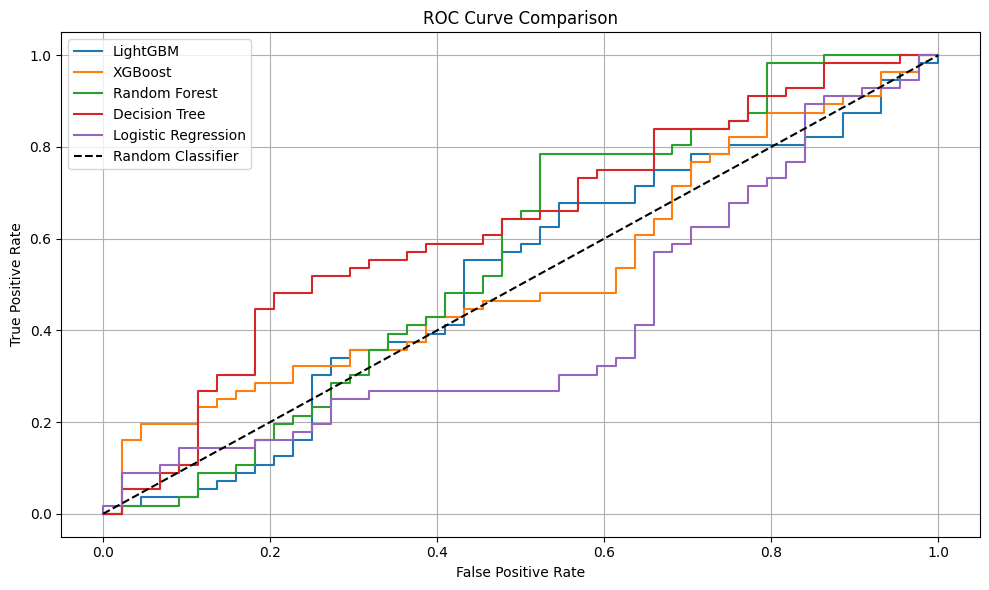

In [54]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Sample y_test and y_scores for simulation
import numpy as np
np.random.seed(42)
y_test = np.random.randint(0, 2, size=100)

# Simulated prediction probabilities for each model
y_score_lgb = np.random.rand(100)
y_score_xgb = np.random.rand(100)
y_score_rf = np.random.rand(100)
y_score_dt = np.random.rand(100)
y_score_lr = np.random.rand(100)

# Compute ROC curve and ROC area for each model
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_score_lgb)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_score_xgb)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_score_dt)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)

# Plot all ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_lgb, tpr_lgb, label='LightGBM')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



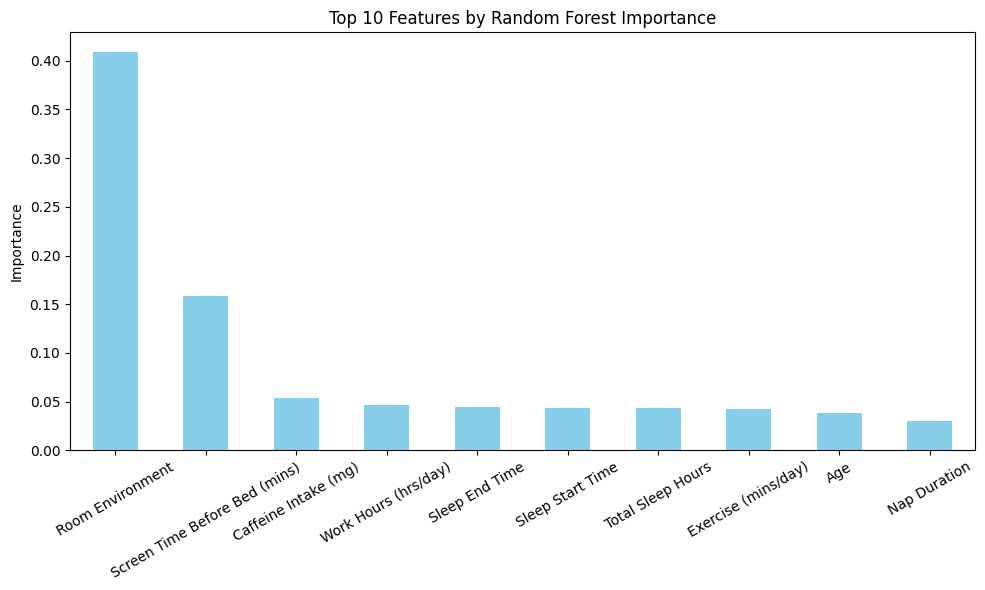

In [49]:
rf_temp = RandomForestClassifier(random_state=42)
rf_temp.fit(x, y)

importances = pd.Series(rf_temp.feature_importances_, index=x.columns)
importances_sorted = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
importances_sorted.plot(kind='bar', color='skyblue')
plt.title("Top 10 Features by Random Forest Importance")
plt.ylabel("Importance")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()